In [34]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt

In [35]:
#### Loading the Data
data = pd.read_excel('sales.xlsx')
data = data[data.Category=='Furniture']
data = data.drop('Category',1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 9727
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 2067 non-null   int64         
 1   Order ID               2067 non-null   object        
 2   Order Date             2067 non-null   datetime64[ns]
 3   Ship Date              2067 non-null   datetime64[ns]
 4   Ship Mode              2067 non-null   object        
 5   Customer ID            2067 non-null   object        
 6   Customer Name          2067 non-null   object        
 7   Segment                2067 non-null   object        
 8   Country                2067 non-null   object        
 9   City                   2067 non-null   object        
 10  State                  2067 non-null   object        
 11  Postal Code            2067 non-null   int64         
 12  Region                 2067 non-null   object        
 13  Pro

In [36]:
data_fur = data[data['Sub-Category']=='Furnishings']
data_fur = data_fur[['Order Date','Quantity']]

In [37]:
data_fur.info()
data_fur1 = data_fur.groupby(pd.Grouper(key='Order Date', freq='1M')).sum()
data_fur1=data_fur1.reset_index()
data_fur1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 5 to 9727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  932 non-null    datetime64[ns]
 1   Quantity    932 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  45 non-null     datetime64[ns]
 1   Quantity    45 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 848.0 bytes


In [38]:
data_fur1.tail()

,Order Date,Quantity
40,2017-08-31,61
41,2017-09-30,133
42,2017-10-31,96
43,2017-11-30,179
44,2017-12-31,171


<AxesSubplot:xlabel='Order Date'>

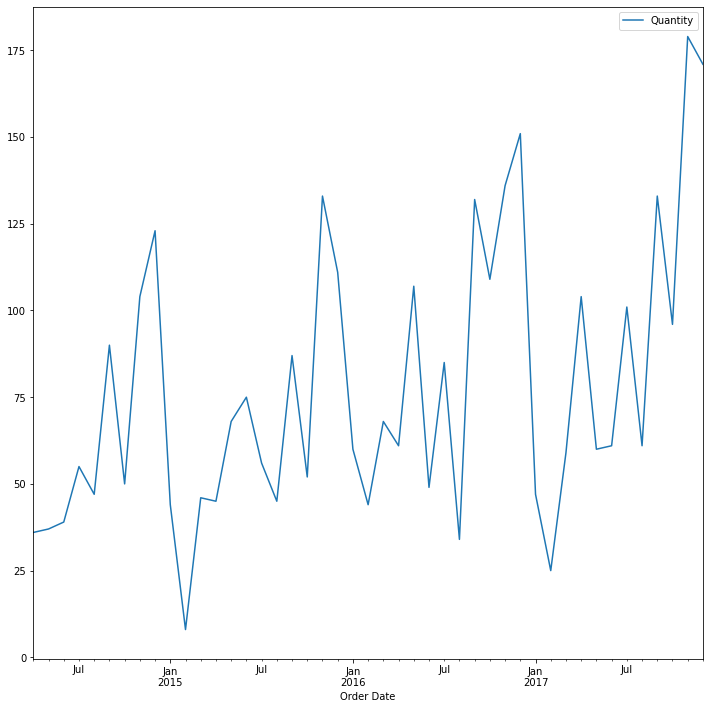

In [39]:
data_fur1.plot.line(x='Order Date',y='Quantity')

In [49]:
temp = data_fur1.ewm(alpha=0.3).mean()
temp

,Quantity,MA,EMA
0,36.000000,NaN,0.000000
1,36.588235,NaN,0.000000
2,37.689498,NaN,0.000000
3,44.523490,NaN,0.000000
4,45.416537,42.800000,15.433991
5,60.574948,49.152941,26.898459
6,57.117748,52.370776,35.225960
7,72.042825,59.014765,42.799183
8,87.972810,67.591894,50.549760
9,74.397498,72.558661,57.344361


In [50]:
data_fur1['MA'] = data_fur1.rolling(window=5).mean()
data_fur1['EMA'] = data_fur1.ewm(alpha=0.3).mean()['EMA'].fillna(0)
#print(MA, EMA)

<AxesSubplot:>

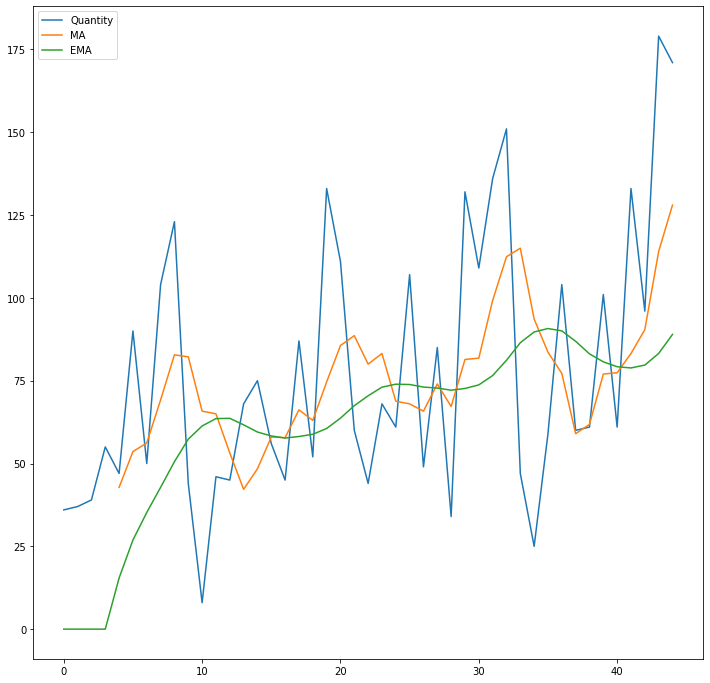

In [51]:
data_fur1[['Quantity','MA','EMA']].plot.line()

In [52]:
from sklearn.metrics import mean_squared_error
RMSE = sqrt(mean_squared_error(data_fur1.Quantity.values, data_fur1.EMA.values))
print(RMSE)

41.97945938074907
